### Visualizing Spectrogram Similarity with PCA

This part of the analysis transforms spectrogram images of 100 recommended songs into a visual map using **Principal Component Analysis (PCA)**. The goal is to explore how spectrograms relate to each other in terms of shape, structure, and content — allowing us to explain the behavior of the recommender system in visual terms.

**Step-by-step explanation:**

1. **Load spectrograms**: All `.png` spectrogram images are loaded from the `spectrograms/` folder and converted to grayscale.
2. **Resize and flatten**: Each image is resized (e.g. to 64x64 pixels) and flattened into a one-dimensional vector so it can be treated as a numeric input.
3. **Create image matrix**: These vectors are stacked to form a matrix, where each row is a spectrogram.
4. **Standardization**: The matrix is standardized (zero mean, unit variance) to ensure all pixel features contribute equally to the analysis.
5. **PCA transformation**: PCA reduces the image matrix to just two dimensions (PC1 and PC2), capturing as much variance in the spectrogram structure as possible.
6. **Scatter plot**: Each spectrogram is plotted as a point in 2D space, annotated with its ID. Points that appear close together likely represent similar time–frequency characteristics in the original audio.

This visualization helps us **interpret clusters of audio content**, identify outliers, and understand **how the recommender system may be grouping songs** based on spectrogram similarity.


🔍 Found 100 spectrograms
⚙️ Running PCA...


/tmp/ipykernel_371/2990119033.py:48: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


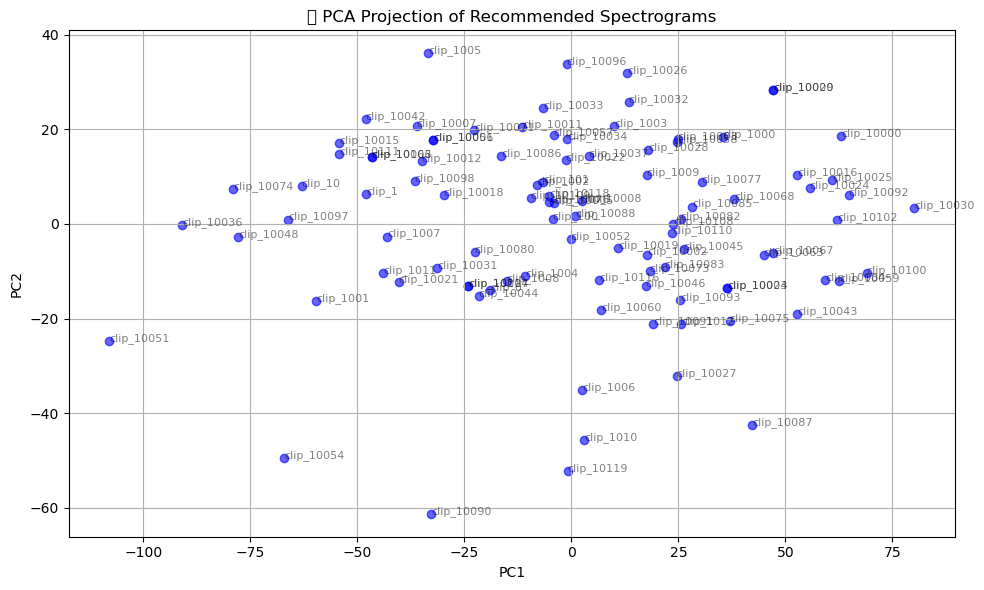

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Path to your 100 spectrograms
spectrogram_dir = "spectrograms"  # or another folder if you've separated recommended ones
image_files = sorted([f for f in os.listdir(spectrogram_dir) if f.endswith(".png")])

print(f"🔍 Found {len(image_files)} spectrograms")

# Load and flatten images
def load_and_flatten_image(path, size=(64, 64)):
    img = Image.open(path).convert("L")  # grayscale
    img = img.resize(size)
    return np.array(img).flatten()

# Create matrix
image_vectors = []
for fname in image_files:
    full_path = os.path.join(spectrogram_dir, fname)
    vec = load_and_flatten_image(full_path)
    image_vectors.append(vec)

image_vectors = np.array(image_vectors)

# Standardize the data
scaler = StandardScaler()
image_vectors_std = scaler.fit_transform(image_vectors)

# Reduce to 2D
print("⚙️ Running PCA...")
pca = PCA(n_components=2)
components = pca.fit_transform(image_vectors_std)

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c='blue', alpha=0.6)
for i, fname in enumerate(image_files):
    plt.annotate(fname.split(".")[0], (components[i, 0], components[i, 1]), fontsize=8, alpha=0.5)
plt.title("🎵 PCA Projection of Recommended Spectrograms")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

⚙️ Running t-SNE (this may take 30–60 sec)...


/tmp/ipykernel_371/4198191775.py:11: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


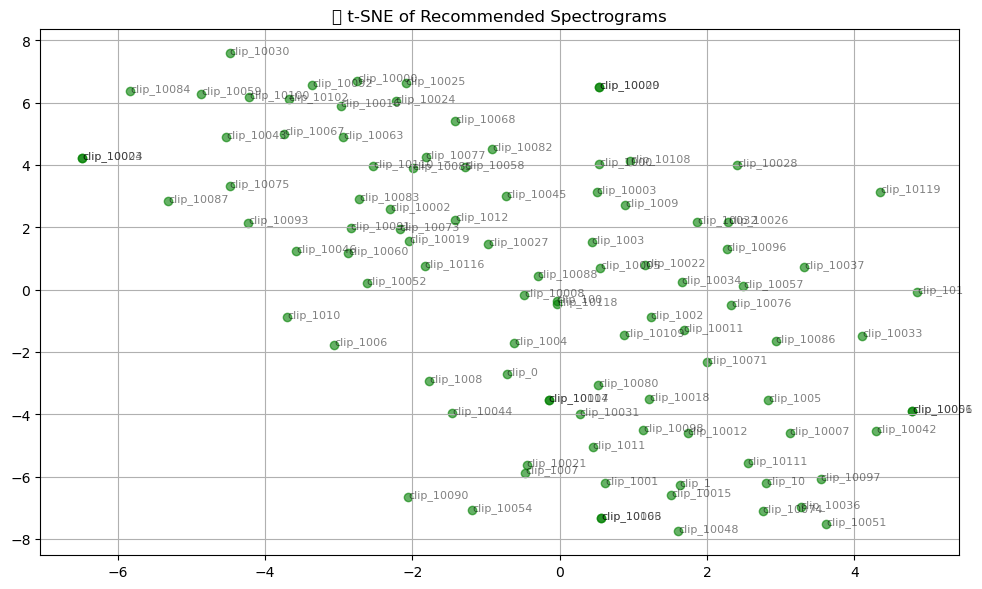

In [3]:
print("⚙️ Running t-SNE (this may take 30–60 sec)...")
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
components_tsne = tsne.fit_transform(image_vectors_std)

plt.figure(figsize=(10, 6))
plt.scatter(components_tsne[:, 0], components_tsne[:, 1], c='green', alpha=0.6)
for i, fname in enumerate(image_files):
    plt.annotate(fname.split(".")[0], (components_tsne[i, 0], components_tsne[i, 1]), fontsize=8, alpha=0.5)
plt.title("🎵 t-SNE of Recommended Spectrograms")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_371/374286781.py:20: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


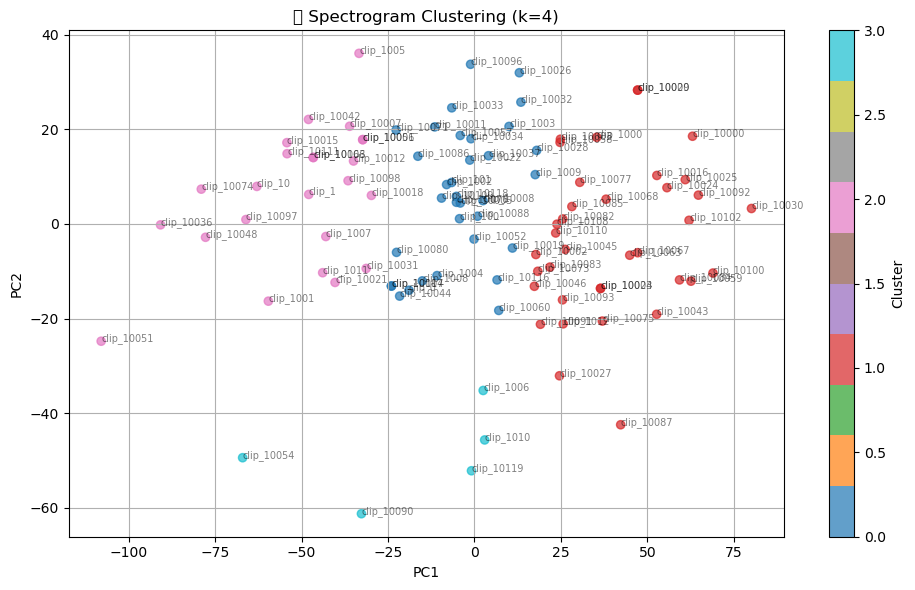

In [4]:
from sklearn.cluster import KMeans

# Use same data as before (PCA or t-SNE components)
X = components  # ← or use components_tsne if you're working with t-SNE

# Run KMeans (try 3–6 clusters; tune as needed)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Plot with cluster coloring
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', alpha=0.7)
for i, fname in enumerate(image_files):
    plt.annotate(fname.split(".")[0], (X[i, 0], X[i, 1]), fontsize=7, alpha=0.5)
plt.title(f"🎧 Spectrogram Clustering (k={n_clusters})")
plt.xlabel("PC1" if X is components else "t-SNE 1")
plt.ylabel("PC2" if X is components else "t-SNE 2")
plt.grid(True)
plt.tight_layout()
plt.colorbar(scatter, label="Cluster")
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load metadata
df = pd.read_csv("dataset.csv")

# Add spectrogram filename column (assumes clip_1.png ... clip_100.png)
df["spectrogram_path"] = df.index + 1
df["spectrogram_path"] = df["spectrogram_path"].apply(lambda x: f"spectrograms/clip_{x}.png")

# Show sample
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,spectrogram_path
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,spectrograms/clip_1.png
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,spectrograms/clip_2.png
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,spectrograms/clip_3.png
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,spectrograms/clip_4.png
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,spectrograms/clip_5.png


In [7]:
# Load your dataset
df = pd.read_csv("dataset.csv")

# Assume the first column is the index you want for matching (e.g., 1000, 1001,...)
# and it's the first column in the CSV, with name 'Unnamed: 0' or similar
df["spectrogram_path"] = df.iloc[:, 0].apply(lambda x: f"spectrograms/clip_{x}.png")


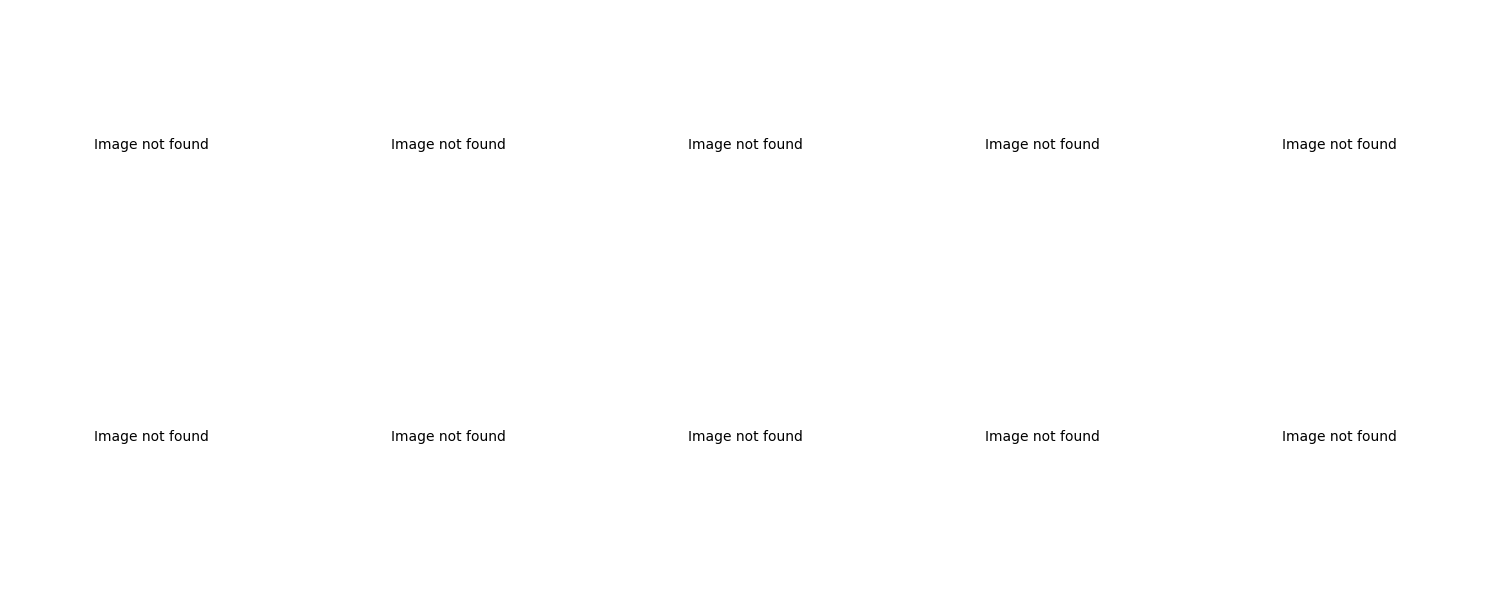

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_spectrograms(df, indices):
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        try:
            img = mpimg.imread(df.loc[idx, "spectrogram_path"])
            plt.imshow(img)
            plt.axis("off")
            plt.title(df.loc[idx, "track_name"], fontsize=8)
        except FileNotFoundError:
            plt.text(0.5, 0.5, "Image not found", ha='center')
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Show top 10 popular songs
top_indices = df.sort_values("popularity", ascending=False).head(10).index
show_spectrograms(df, top_indices)


In [11]:
import os

files = os.listdir("spectrograms")
print(files[:10])  # sample to see which ID format is used



['clip_10018.png', 'clip_10030.png', 'clip_10024.png', 'clip_0.png', 'clip_1.png', 'clip_10025.png', 'clip_10031.png', 'clip_10019.png', 'clip_10027.png', 'clip_10033.png']
